In [249]:
###Discovering the relation between sex, ethnicity, and other characteristics with the wage disparity

# Loading Required Python Packages

In [289]:
# Imports
import pandas as pd
import numpy as np
import requests # For the currency exchange rates
from forex_python.converter import CurrencyRates
from plotnine import ggplot, geom_histogram, aes, theme, guides, guide_legend, geom_col, element_text, ggtitle
import seaborn as sns
from plotnine.themes.themeable import legend_position
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Data input, cleaning, transformation, and validation

In [251]:
# First, we import the data
file = "salary_responses.csv"
data = pd.read_csv(file)
c = CurrencyRates()

In [252]:
data.head(5) # Survey like questions

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Data cleaning, validation
<p>We delete the columns that are not helpful for our purposes, such as timestamp, additional context for title, and for income</p>

In [253]:
# Data cleaning, validation
data = data.drop( data.columns[[0,4,9]],axis=1)
# We now change the names of the columns to make manipulation easier
data.columns = ["Age", "Industry", "Job Title", "Annual Salary", "Bonus", 
                "Currency", "Alternate Currency", "Country", "US State", "US City", 
                "Work experience", "Work experience in field", "Education", "Gender", "Race"]

In [254]:
data.head(5)

,Age,Industry,Job Title,Annual Salary,Bonus,Currency,Alternate Currency,Country,US State,US City,Work experience,Work experience in field,Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Missing Values
<p>Here we explore the fields with missing values to help us decide on how to treat those going forward. </p>

It is evident from the, **attribute list**  and **heat map**, below, that `Alternate Currency`, `Bonus`, `US State`,`US City`,`Education,Gender` as well as `Race` all have missing values.

In [255]:
data.isna().sum()

Age                             0
Industry                       72
Job Title                       0
Annual Salary                   0
Bonus                        7263
Currency                        0
Alternate Currency          27772
Country                         0
US State                     4990
US City                        79
Work experience                 0
Work experience in field        0
Education                     215
Gender                        167
Race                          169
dtype: int64

#### Missing Values Heat Map Visualizing With Seaborn
Below is a Seaborn **Heat Map** that shows columns with missing values:

<Axes: >

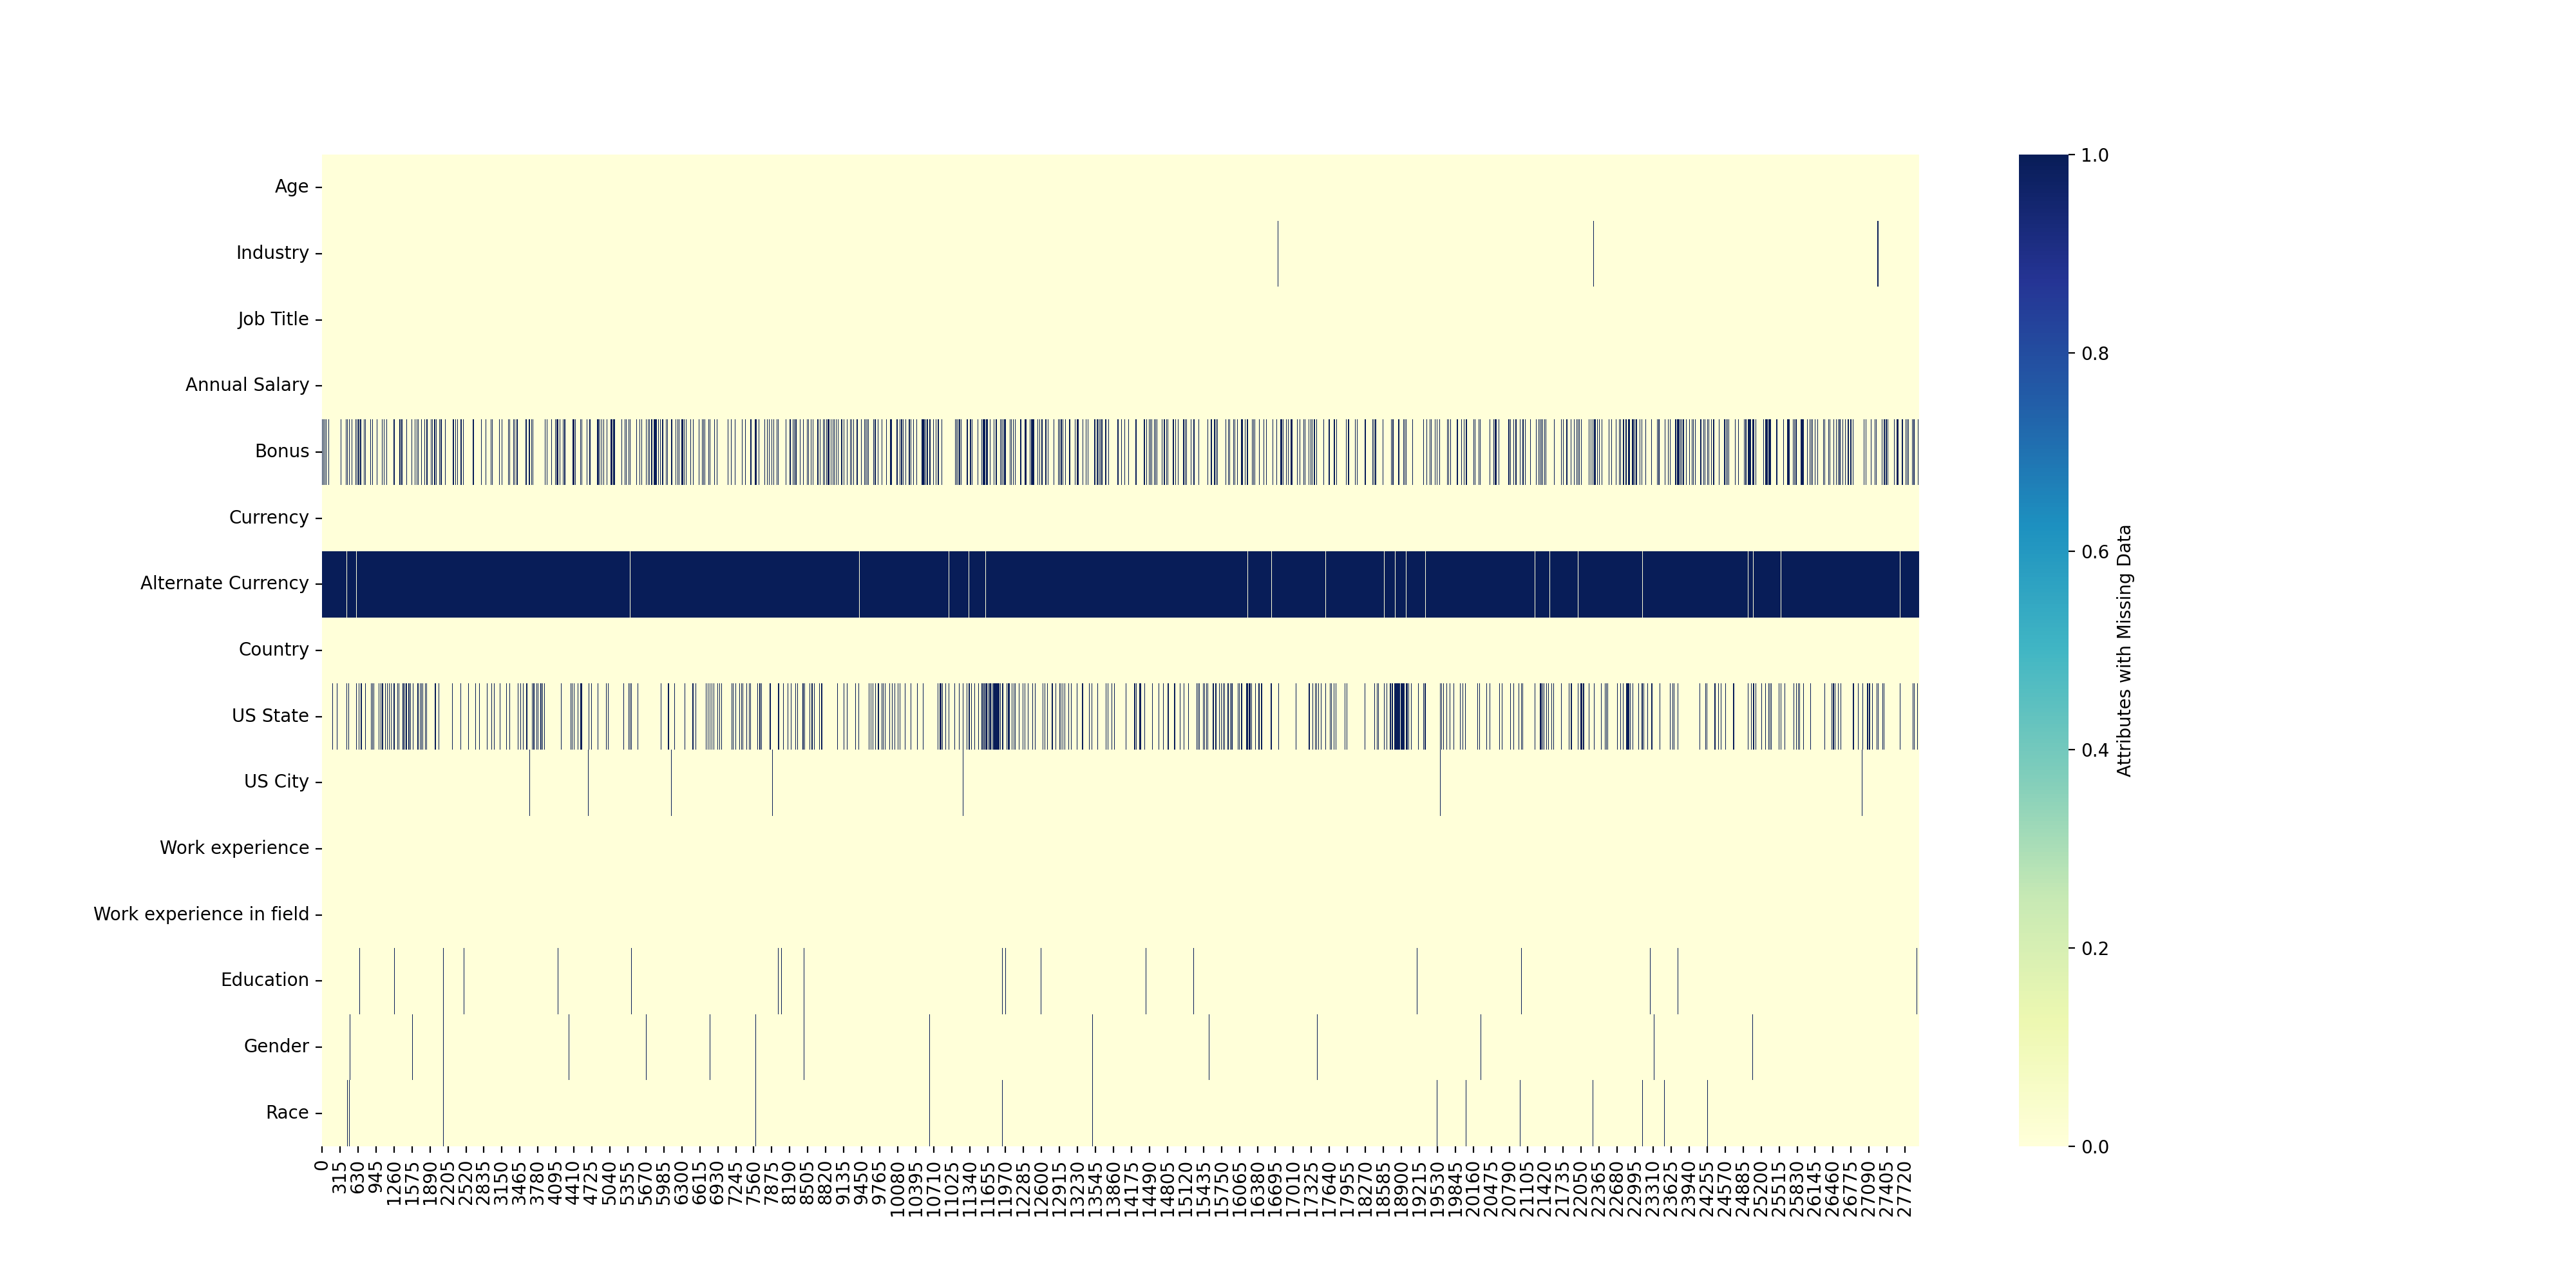

In [256]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Attributes with Missing Data'}) 

### Chosing Attributes/Columns to Drop Non-Values
**NA values** are dropped from some columns, such as `Annual Salary`, `Education`, `Race`, and `Gender`. This is because these columns or features  are useful for predictions and model creation, they cannot be used them if they are incomplete.

In [257]:
data.count()

Age                         27967
Industry                    27895
Job Title                   27967
Annual Salary               27967
Bonus                       20704
Currency                    27967
Alternate Currency            195
Country                     27967
US State                    22977
US City                     27888
Work experience             27967
Work experience in field    27967
Education                   27752
Gender                      27800
Race                        27798
dtype: int64

In [258]:
data.dropna(subset=["Annual Salary", "Education", "Race", "Gender"], inplace=True)

In [259]:
data.isna().sum()

Age                             0
Industry                       69
Job Title                       0
Annual Salary                   0
Bonus                        7082
Currency                        0
Alternate Currency          27333
Country                         0
US State                     4872
US City                        78
Work experience                 0
Work experience in field        0
Education                       0
Gender                          0
Race                            0
dtype: int64

In [260]:
data.count() # Ensure data in NA was removed

Age                         27521
Industry                    27452
Job Title                   27521
Annual Salary               27521
Bonus                       20439
Currency                    27521
Alternate Currency            188
Country                     27521
US State                    22649
US City                     27443
Work experience             27521
Work experience in field    27521
Education                   27521
Gender                      27521
Race                        27521
dtype: int64

### Data Imputing and Feature Engineering
The `Annual Salary` column which will serve as the label or outcome variable is of type `string` which is not ideal for carrying out mathematical operations. So the type needs to be changed from `string` to `numeric` type.

Also **NA** values in `Bonus` column are imputed with 0, since this will be added to the `Annual Salary` column. 

A new column `Total` was created as a sum of  `Annual Salary` and `Bonus`. Subsequently, these columns are dropped since they are no longer needed.

In [261]:
# The type for Annual Salary is string, 
data["Annual Salary"] = data["Annual Salary"].apply(lambda f: float(f.split()[0].replace(',', '')))
data["Annual Salary"] = data["Annual Salary"].astype(float)

In [262]:
# Now we need to change the NaN values from Bonus to 0
data["Bonus"] = data["Bonus"].fillna(0)
data["Total earnings"] = data["Annual Salary"] + data["Bonus"]

In [263]:
# Drop Bonus and Annual Salary columns
data.drop(["Annual Salary", "Bonus"], axis = 1, inplace=True)

In [264]:
data.sample(5)

,Age,Industry,Job Title,Currency,Alternate Currency,Country,US State,US City,Work experience,Work experience in field,Education,Gender,Race,Total earnings
4436,35-44,Engineering or Manufacturing,Lead Engineer,USD,NaN,United States,Wisconsin,La Crosse,11 - 20 years,11 - 20 years,College degree,Woman,White,132000.0
21397,25-34,Computing or Tech,Software Engineer II,USD,NaN,USA,New York,New York City,5-7 years,5-7 years,College degree,Man,Another option not listed here or prefer not t...,145000.0
12511,45-54,Education (Higher Education),Professor,USD,NaN,USA,Washington,Spokane,21 - 30 years,21 - 30 years,PhD,Woman,White,78500.0
20882,35-44,Entertainment,Legal Assistant,USD,NaN,USA,California,Los Angeles,11 - 20 years,2 - 4 years,College degree,Non-binary,White,89000.0
13160,25-34,"Accounting, Banking & Finance",Biller,USD,NaN,USA,Pennsylvania,Lancaster,5-7 years,2 - 4 years,Some college,Woman,White,45000.0


In [265]:
data.count()

Age                         27521
Industry                    27452
Job Title                   27521
Currency                    27521
Alternate Currency            188
Country                     27521
US State                    22649
US City                     27443
Work experience             27521
Work experience in field    27521
Education                   27521
Gender                      27521
Race                        27521
Total earnings              27521
dtype: int64

**Messy Data from User Input**

Another challenge the data presents is that the observations use a **currency** in the `Alternate Currency` column. But this column allows for user input, which, as we know, makes the columns vunerable to the entry of messy data.

As can be seen in the above display below, the values are too varied, written not in currency code, and explanations instead of the currency. 

In [266]:
# I recommend to drop Alternate Currency 

In [267]:
data.drop(["Alternate Currency"], axis = 1, inplace=True)

In [268]:
data.count()

Age                         27521
Industry                    27452
Job Title                   27521
Currency                    27521
Country                     27521
US State                    22649
US City                     27443
Work experience             27521
Work experience in field    27521
Education                   27521
Gender                      27521
Race                        27521
Total earnings              27521
dtype: int64

In [269]:
data.head(5)

,Age,Industry,Job Title,Currency,Country,US State,US City,Work experience,Work experience in field,Education,Gender,Race,Total earnings
0,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0
1,25-34,Computing or Tech,Change & Internal Communications Manager,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,58600.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0
3,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,67000.0


**Job Title Data Cleaning and Imputing**

Job Title, is another user-input field that is frought with messy data that needs to be cleaned and imputed with appropriate values. All **Job Titles** with a count of 1 are put together and imputed as `OTHER` in the `Job Title` column of the **data** dataframe.

In [270]:
data["Job Title"] = data["Job Title"].str.upper()
data["Job Title"] = data["Job Title"].str.strip()
data.loc[data["Job Title"].str.contains("EXEC"), "Job Title"] = "EXECUTIVE"
data.loc[data["Job Title"].str.contains("CONSULTANT"), "Job Title"] = "CONSULTANT"
data.loc[data["Job Title"].str.contains("TEACH"), "Job Title"] = "TEACHER"
data.loc[data["Job Title"].str.contains("MANAGER")|
      data["Job Title"].str.contains("ADMIN"), "Job Title"] = "MANAGER"
data.loc[data["Job Title"].str.contains("ACCOUNTANT"), "Job Title"] = "ACCOUNTANT"
data.loc[data["Job Title"].str.contains("SPECIALIST"), "Job Title"] = "SPECIALIST"
data.loc[data["Job Title"].str.contains("ANALYST"), "Job Title"] = "ANALYST"
data.loc[data["Job Title"].str.contains("ASSOCIATE"), "Job Title"] = "ASSOCIATE"
data.loc[data["Job Title"].str.contains("LEGAL"), "Job Title"] = "LEGAL"
data.loc[data["Job Title"].str.contains("ASSISTANT"), "Job Title"] = "ASSISTANT"
data.loc[data["Job Title"].str.contains("ARTIST"), "Job Title"] = "ARTIST"
data.loc[data["Job Title"].str.contains("ADVISOR"), "Job Title"] = "ADVISOR"
data.loc[data["Job Title"].str.contains("RESEARCH")|
      data["Job Title"].str.contains("R&D")|
      data["Job Title"].str.contains("SCIENTIST"), "Job Title"] = "RESEARCH"
data.loc[data["Job Title"].str.contains("LEAD"), "Job Title"] = "LEAD"
data.loc[data["Job Title"].str.contains("SOFTWARE")|
      data["Job Title"].str.contains("DEVELOPER"), "Job Title"] = "SWE"
data.loc[data["Job Title"].str.contains("ENGI"), "Job Title"] = "ENGINEER"
data.loc[data["Job Title"].str.contains("SENIOR"), "Job Title"] = "SENIOR"

In [271]:
data["Job Title"].value_counts()

Job Title
MANAGER                          6096
ANALYST                          1633
SWE                              1397
ENGINEER                         1267
ASSOCIATE                        1155
                                 ... 
COLLEAGUE                           1
PASSPORT OFFICER                    1
EVENTS & DEVELOPMENT DIRECTOR       1
DIRECTOR/LIBRARIAN                  1
ENVIRONMENTAL RISK ASSESSOR         1
Name: count, Length: 4683, dtype: int64

In [272]:
frame = {"Job Title":data["Job Title"].unique(),
         "count":data["Job Title"].value_counts()}
         
temp = pd.DataFrame(frame)
# Filter out jobs with only 1 occurrence and store them in a list
jobs_to_other = temp[temp["count"]==1]["Job Title"].tolist()

# Replace all single-occurrence jobs with 'OTHER'
data.loc[data["Job Title"].isin(jobs_to_other), "Job Title"] = "OTHER"

In [273]:
data["Job Title"].value_counts()

Job Title
MANAGER                         6096
OTHER                           4883
ANALYST                         1633
SWE                             1397
ENGINEER                        1267
                                ... 
MARKET ACCESS                      1
RETAIL SALES SEPCIALIST            1
LEGISLATIVE AFFAIRS DIRECTOR       1
WETLAND BIOLOGIST                  1
PAYROLL & HR COORDINATOR           1
Name: count, Length: 1001, dtype: int64

**Dealing with Alternate Currencies**

Having cleaned the data up to this point, we now perform the exchange rate computation between `Alternate Currencies` and `USD`.

In [274]:
key = "c43e42e958c4b9df95f29ec3"
url = "https://v6.exchangerate-api.com/v6/" + key + "/pair/"#+ "/latest/USD"
print(alt_cur)
ex_rat = {}
for ac in alt_cur:
    #break
    s = url + ac + "/USD"
    r = requests.get(s)#.json()["conversion_rate"]
    #print(r)
    rjson = r.json()
    #print(rjson)
    c = rjson["conversion_rate"]
    #print(c)
    ex_rat[ac] = c

['INR' 'ARS' 'MYR' 'CHF' 'KWD' 'NOK' 'USD' 'BRL' 'SEK' 'CAD' 'DKK' 'EUR'
 'COP' 'TTD' 'MXN' 'CZK' 'GBP' 'ZAR' 'PHP' 'PLN' 'TRY' 'CNY' 'ILS' 'AUD'
 'TWD' 'NZD' 'SGD' 'KRW' 'THB' 'IDR' 'LKR' 'SAR' 'HRK' 'NGN']


In [275]:
for i in data.index: 
    data["Total"][i] = data["Total"][i] * ex_rat[data["Alternate Currency"][i]]
data.loc[data["Alternate Currency"] == "USD"]

KeyError: 'Total'

**Cleaning the Country Column**

The Country column is another free-entry column that contain inconsistent and messy data and required cleaning. All entries were converted to uppercase to deal with differences in case for the entries. The column values were then imputed with values that the team deemed appropriate after careful examination of all observations. We made use of the `str` *contains()* method to deal with inconsistent country entries. 

In [276]:
data["Country"] = data["Country"].str.upper()
data["Country"] = data["Country"].str.strip()
data.loc[data["Country"].str.contains("ARGENTINA"), "Country"] = "ARGENTINA"
data.loc[data["Country"].str.contains("CHINA"), "Country"] = "CHINA"
data.loc[data["Country"].str.contains("U.S.A") | 
      data["Country"].str.contains("USA") |
      data["Country"].str.contains("UNITED STATES")|
      data["Country"].str.match("US"), "Country"] = "USA"
data.loc[data["Country"].str.contains("AUSTRALIA"), "Country"] = "AUSTRALIA"
data.loc[data["Country"].str.contains("CZECH"), "Country"] = "CZECH REPUBLIC"
data.loc[data["Country"].str.contains("XICO"), "Country"] = "MEXICO"
data.loc[data["Country"].str.contains("BRAZIL") |
      data["Country"].str.contains("BRASIL"), "Country"] = "BRAZIL"

**Deleting Redundant Columns**

Since every observation is now in the same currency, we can get rid of the `Currency` and `Alternate Currency` columns.

`US State`, `US City` can be dropped, as these values are just too varied and are, indeed, not likely to country much to the analsis since earnings are compared accross multiple countries.

In [277]:
data.drop(columns=["Currency", "US State", "US City"], inplace=True)
data.sample(10)

,Age,Industry,Job Title,Country,Work experience,Work experience in field,Education,Gender,Race,Total earnings
8728,25-34,Engineering or Manufacturing,ENGINEER,USA,5-7 years,2 - 4 years,College degree,Man,White,102000.0
4926,35-44,Engineering or Manufacturing,LEGAL,USA,8 - 10 years,5-7 years,College degree,Woman,White,76997.0
1258,45-54,Government and Public Administration,"DIRECTOR, FEDERAL REAL PROPERTY POLICY",CANADA,31 - 40 years,31 - 40 years,Master's degree,Man,White,147100.0
23184,25-34,Computing or Tech,TECHNICAL WRITER,USA,8 - 10 years,5-7 years,College degree,Woman,White,146000.0
11615,45-54,Health care,SPECIALIST,UK,21 - 30 years,21 - 30 years,"Professional degree (MD, JD, etc.)",Woman,White,42000.0
20549,35-44,Education (Higher Education),OTHER,CANADA,11 - 20 years,8 - 10 years,Master's degree,Woman,"White, Another option not listed here or prefe...",64600.0
9661,25-34,Education (Higher Education),ASSISTANT,USA,1 year or less,1 year or less,PhD,Woman,White,64200.0
21176,35-44,Media & Digital,MANAGER,USA,8 - 10 years,5-7 years,Master's degree,Woman,White,55000.0
12282,35-44,Government and Public Administration,ASSISTANT,USA,11 - 20 years,11 - 20 years,College degree,Woman,White,81000.0
13637,25-34,"Accounting, Banking & Finance",SENIOR,USA,11 - 20 years,8 - 10 years,Master's degree,Other or prefer not to answer,Another option not listed here or prefer not t...,129000.0


In [278]:
data.columns

Index(['Age', 'Industry', 'Job Title', 'Country', 'Work experience',
       'Work experience in field', 'Education', 'Gender', 'Race',
       'Total earnings'],
      dtype='object')

### NOTE:
We can also create income brackets, which would turn our only numerical label into a categorical label. 
For the brackets, the tax brackets for income in the United States were used
**data["Total"] = pd.cut(data["Total"], [0,11000, 44725, 95375, 182100, 231250, 578125 ,float("inf")])
data.Total.value_counts()**

This will be done during the **modeling phase** of the project. For now, the Total value is left as a *float* type.

# Exploratory Analysis of the Cleaned Data

Now that the data is in a consistent state, we carry out a bit more exploration of the data for better understanding before starting the **modeling phase**.

The first observation we make, as evidenced below, is that most fields are categorical, with only `Total` column being numerical. 

This is because the categories that could be numerical or boolean, such as `Age` and `Gender`, include a window for different values, and for Gender, there is the possibility to include non-binary genders. 

In [279]:
data.Country.value_counts()

Country
USA                        22035
CANADA                      1645
UK                           681
UNITED KINGDOM               619
U.S.                         591
                           ...  
UNITEED STATES                 1
AFGHANISTAN                    1
VIRGINIA                       1
JERSEY, CHANNEL ISLANDS        1
CANADÁ                         1
Name: count, Length: 216, dtype: int64

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27521 entries, 0 to 27966
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       27521 non-null  object 
 1   Industry                  27452 non-null  object 
 2   Job Title                 27521 non-null  object 
 3   Country                   27521 non-null  object 
 4   Work experience           27521 non-null  object 
 5   Work experience in field  27521 non-null  object 
 6   Education                 27521 non-null  object 
 7   Gender                    27521 non-null  object 
 8   Race                      27521 non-null  object 
 9   Total earnings            27521 non-null  float64
dtypes: float64(1), object(9)
memory usage: 2.3+ MB


## Visualization
Here we give pictorial view of how cleaned data look like.

### Distributions of Total Earnings (Annual Salary + Bonus)

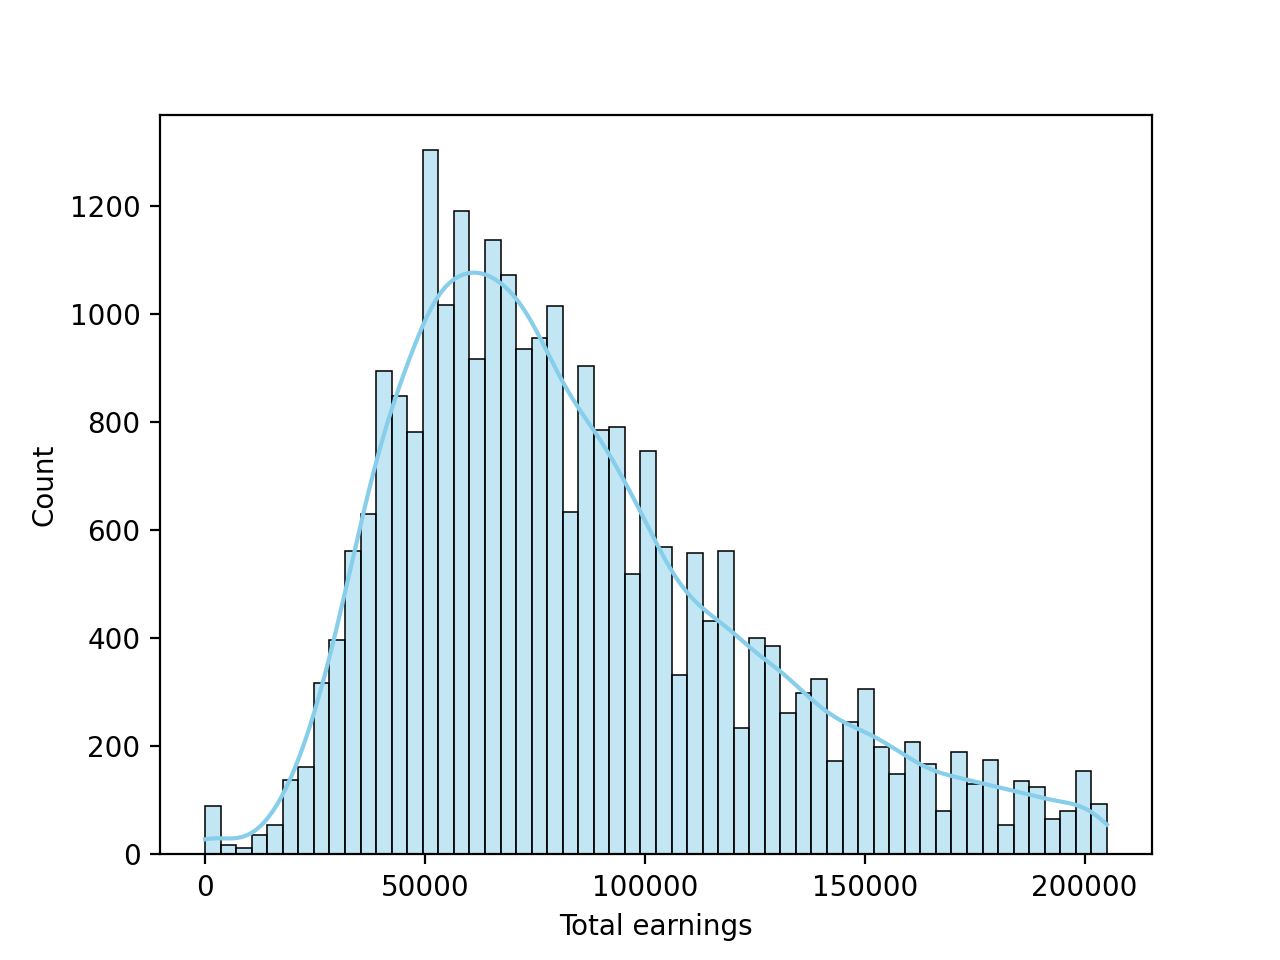

In [281]:
Q1 = data["Total earnings"].quantile(0.25)
Q3 = data["Total earnings"].quantile(0.75)
IQR = Q3 - Q1
data_filtered = data[~((data["Total earnings"] < (Q1 - 1.5 * IQR)) |(data["Total earnings"] > (Q3 + 1.5 * IQR)))]
sns.histplot(data=data_filtered, x="Total earnings", color="skyblue", kde=True)
plt.show()


### Distributions of Total Earnings by Gender

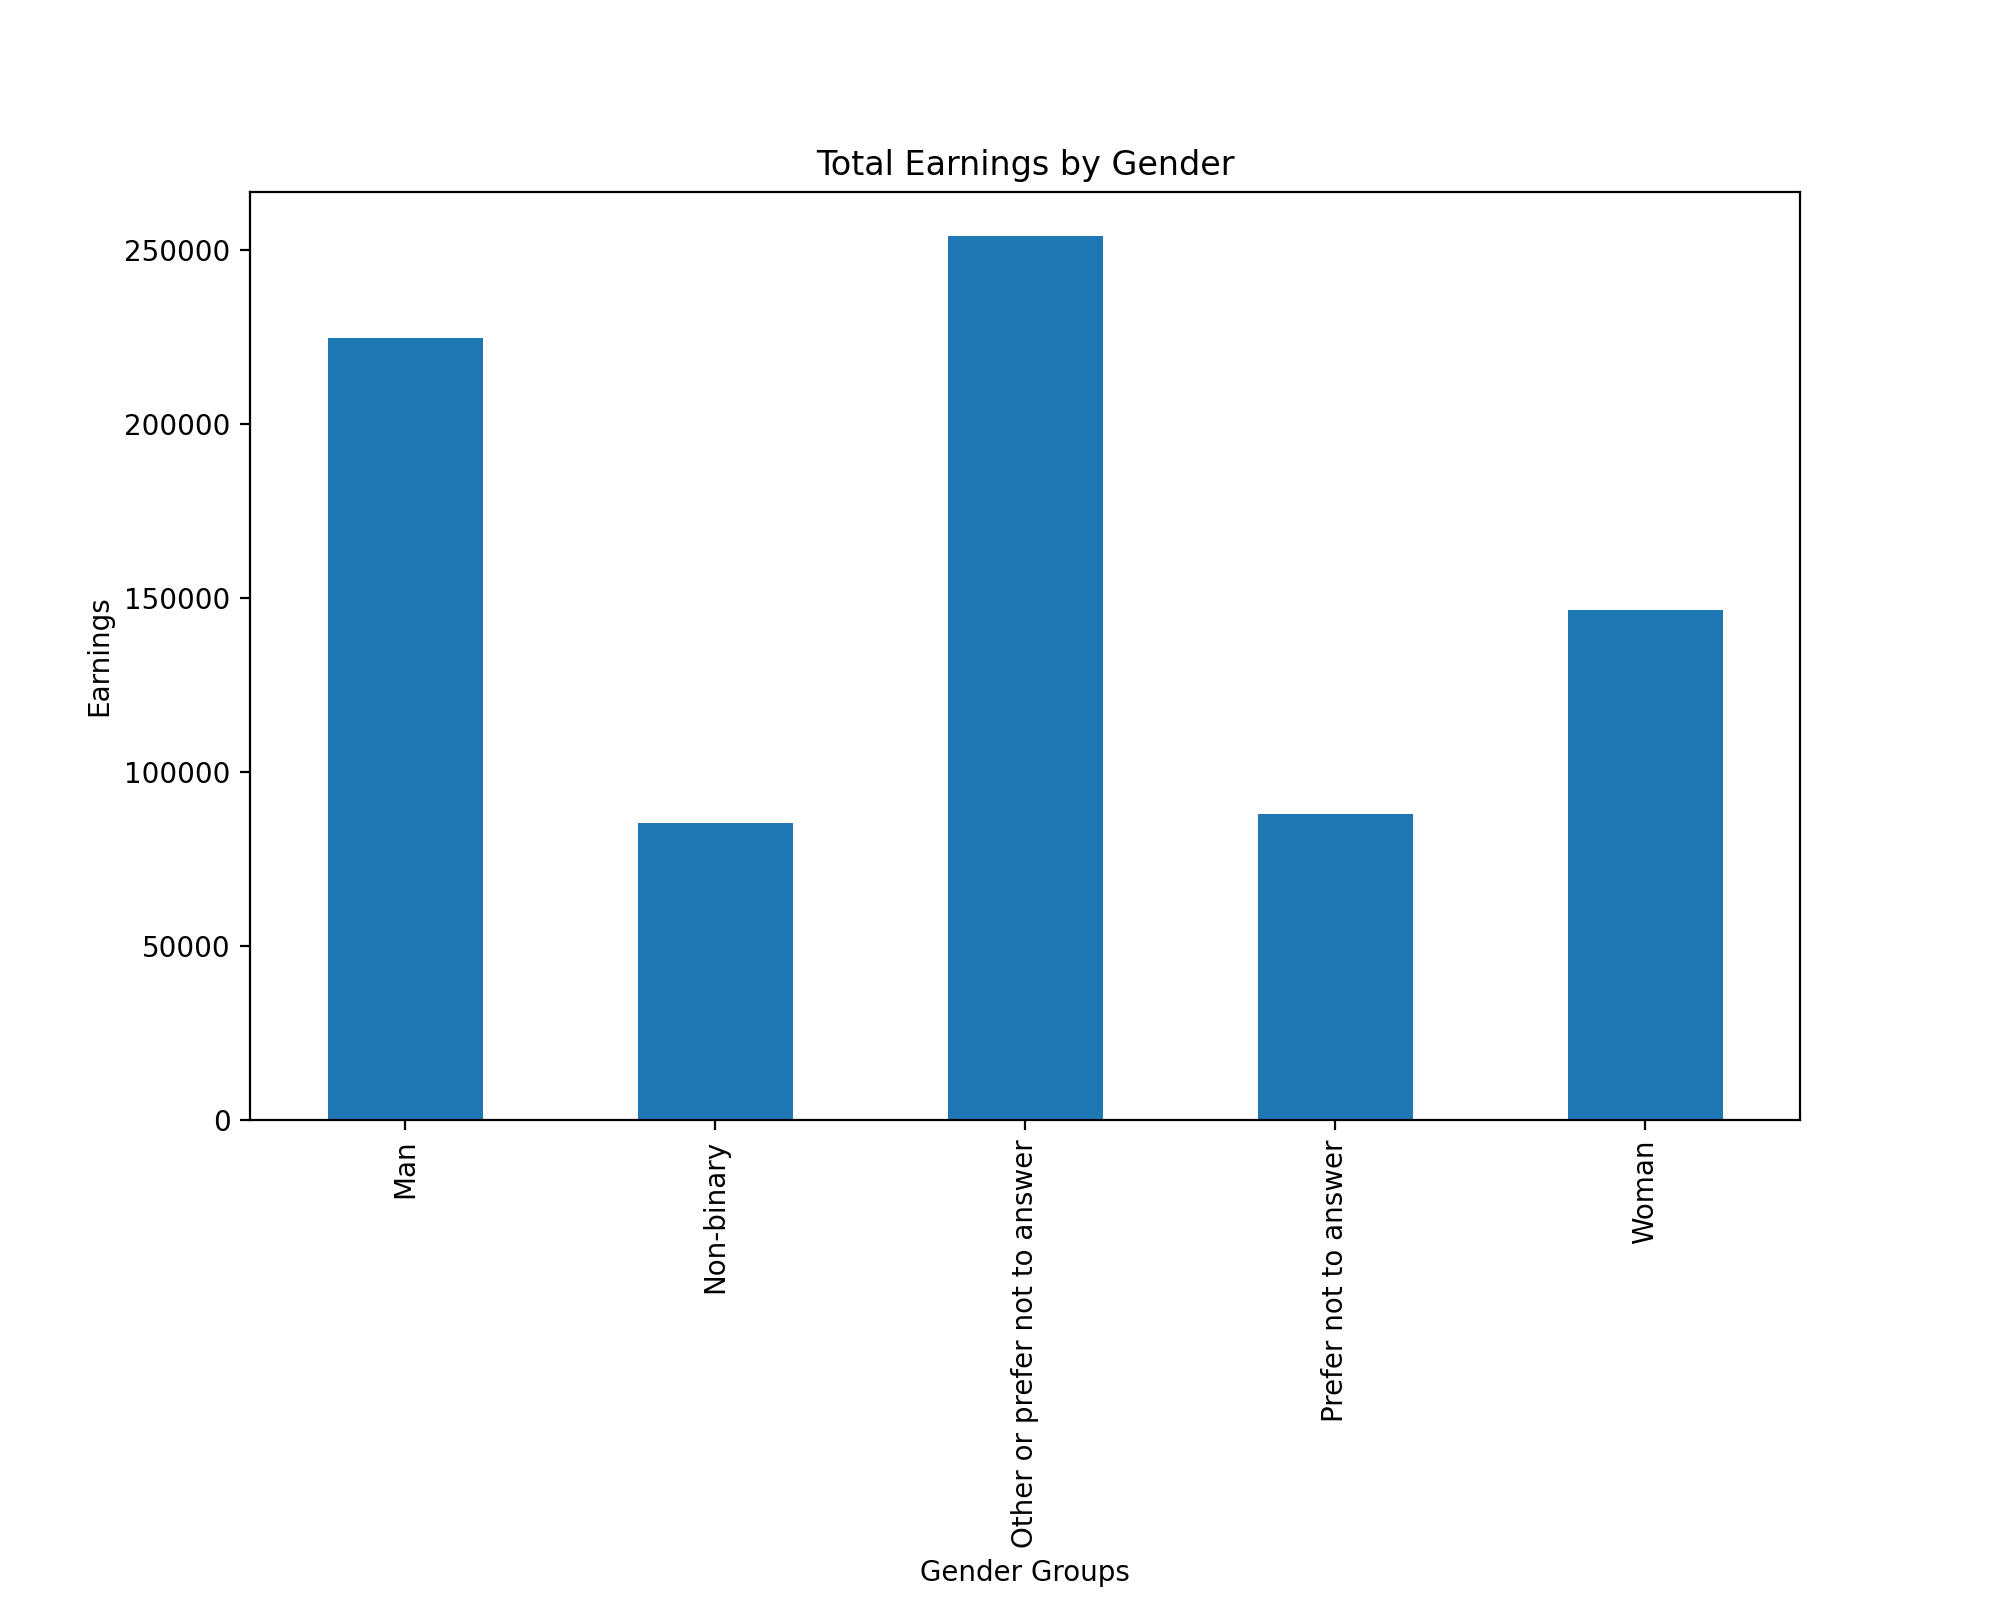

In [282]:
gender_earnings = round(data.groupby("Gender")['Total earnings'].mean(),2)
gender_earnings.plot(kind='bar', figsize=(10, 8))
plt.subplots_adjust(bottom=.3)
plt.title('Total Earnings by Gender')
plt.xlabel("Gender Groups")
plt.ylabel("Earnings")
plt.show()

c:\Users\Ignacio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


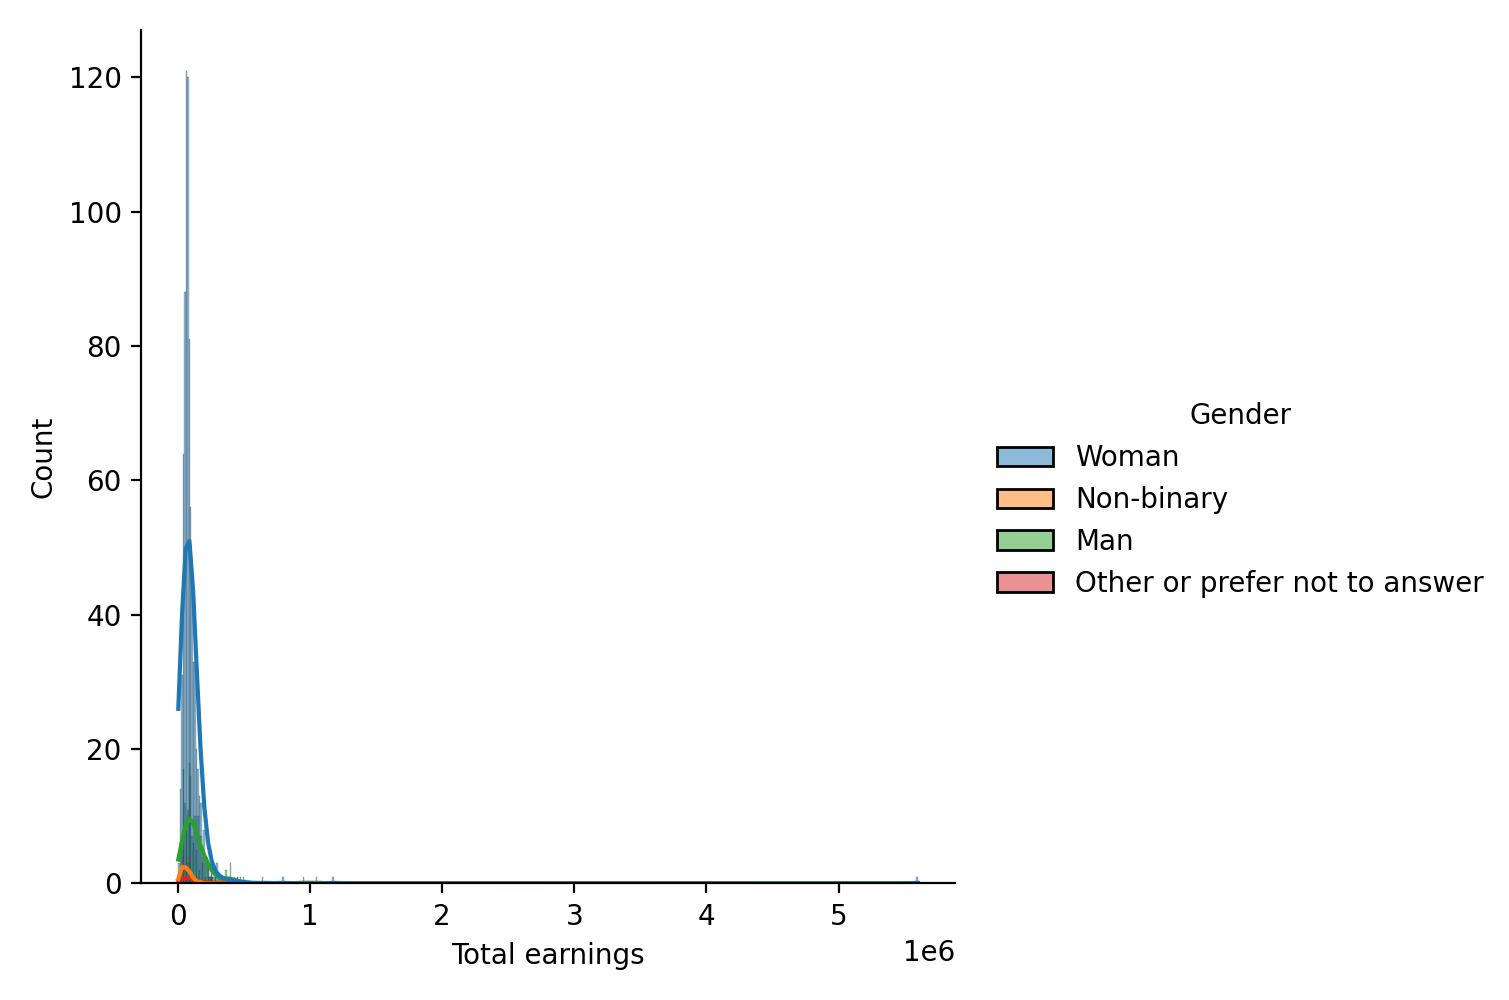

In [293]:
subset_data = data.sample(n=1000) 
sns.displot(subset_data, x="Total earnings", hue="Gender", kde=True)

In [295]:
sns.displot(data, x="Total earnings", col="Gender")

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x0000020644766560>
Traceback (most recent call last):
  File "c:\Users\Ignacio\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


<Axes: xlabel='Total earnings', ylabel='Density'>

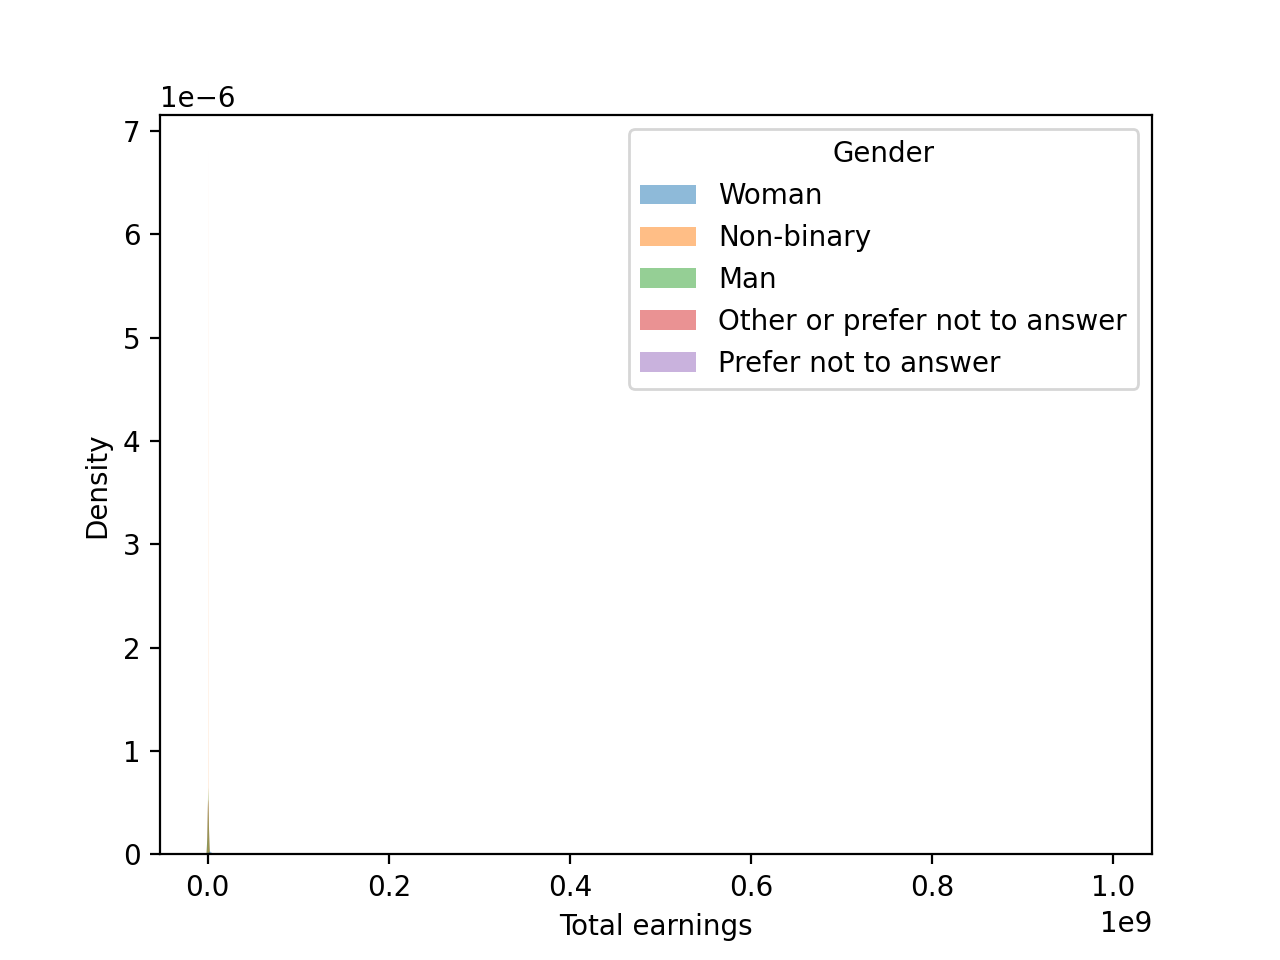

In [294]:
sns.kdeplot(data=data, x="Total earnings", hue="Gender",fill=True, common_norm=False,
   alpha=.5, linewidth=0,warn_singular=False)

**Unadjusted Salary Gap Between Man & Woman**

In [ ]:
female_average_salary = np.mean(data[data['Gender']=="Woman"]['Total earnings'])
print(female_average_salary)

58380.84377378639


In [ ]:
male_average_salary = np.mean(data[data['Gender']=="Man"]['Total earnings'])
print(male_average_salary)

56247.889800000004


In [ ]:
print("Unadjusted Salary Gap: {:.2f}".format(female_average_salary-male_average_salary))

Unadjusted Salary Gap: 2132.95


*On the surface, the data show that women on average earn **USD2,132.95** more than than men.* This of does not take into consideration other gender preferences.

### Distributions of Total Earnings by Different Age Groups

Text(0, 0.5, 'Earnings')

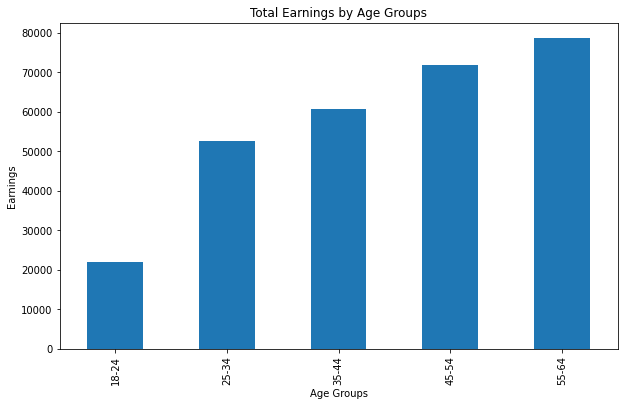

In [ ]:
age_group_earnings = round(data.groupby("Age")['Total earnings'].mean(),2)
age_group_earnings.plot(kind='bar', figsize=(10, 6))
plt.title('Total Earnings by Age Groups')
plt.xlabel("Age Groups")
plt.ylabel("Totak Earnings")

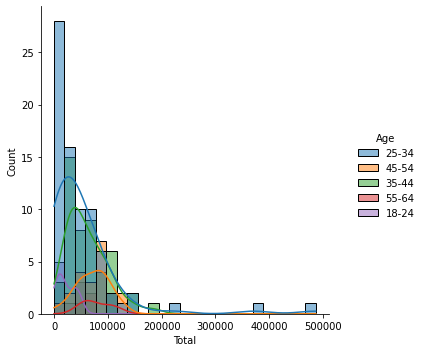

In [ ]:
sns.displot(data, x="Totalnearnings", hue="Age",kde=True)

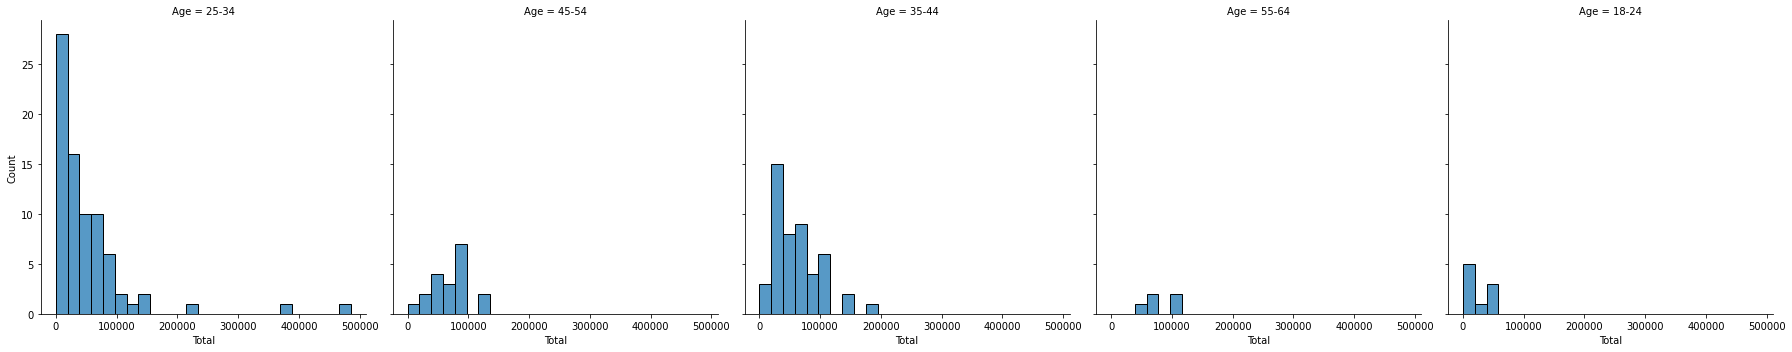

In [ ]:
sns.displot(data, x="Total earnings", col="Age")

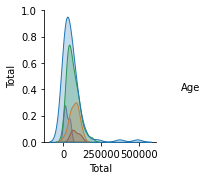

In [ ]:
sns.pairplot(data, hue ='Age')
plt.show()

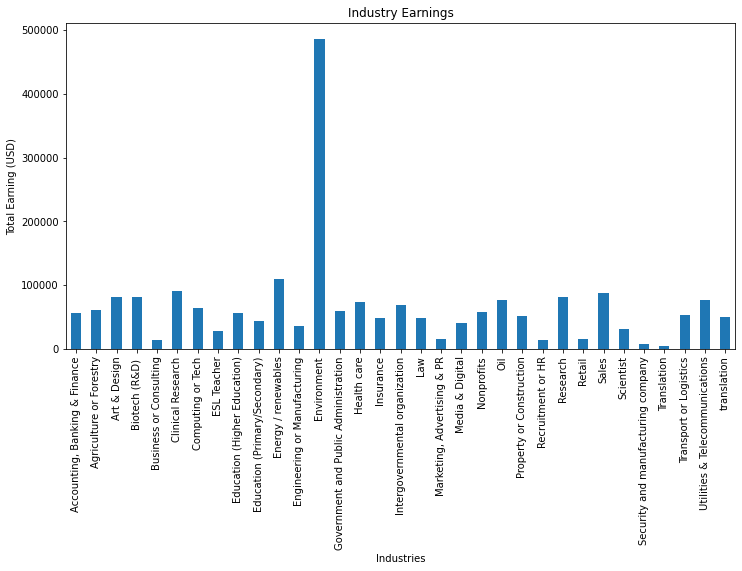

In [ ]:
industry_earnings = round(data.groupby("Industry")['Total earnings'].mean(),2)

industry_earnings.plot(kind='bar',figsize=(12, 6)) 
plt.title('Industry Earnings') 
plt.xlabel('Industries') 
plt.ylabel('Total Earning') 
plt.show()

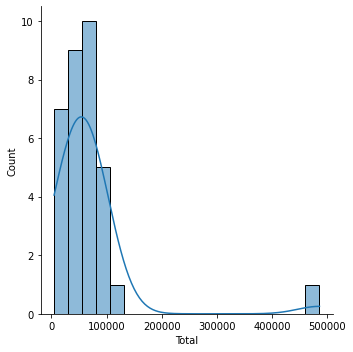

In [ ]:
sns.displot(industry_earnings,kde=True)

In [ ]:
p = (
ggplot(data, aes(x="Total earnings", color="Gender"))+
    geom_histogram(fill="white", position="dodge")
)
p

ModuleNotFoundError: No module named 'matplotlib.layout_engine'

In [ ]:
data.Gender.value_counts()

Woman                            103
Man                               50
Other or prefer not to answer      5
Non-binary                         1
Name: Gender, dtype: int64

It can be observed that not only most of the responses in the survey are from women, and most of the original >120000 responses have been deleted. 
It cannot be observed a direct relationship between Gender and Total

In [ ]:
p = (
ggplot(data, aes(x="Total", color="Age"))+
    geom_histogram(fill="white", position="dodge")
)
p

ModuleNotFoundError: No module named 'matplotlib.layout_engine'

It can be observed that most of the participants are in the range of 25-34, and most of them are in the Total range between 0 and 50k. 
Unfortunately, as previously seen, most of the participants are in the range of 25-34, which creates a bias in any model that can be produced with this data (after cleaning). 

In [ ]:
p = (
ggplot(data, aes(x="Race", color="Race"))+
    geom_histogram(fill="white", position="dodge") +
    theme(
        legend_direction='horizontal',
        legend_position='bottom',
        legend_box_spacing=0.25,
  ) +
 guides(fill=guide_legend(nrow=5, byrow=True))
)
p

ModuleNotFoundError: No module named 'matplotlib.layout_engine'

In [ ]:
data.head(5)

,Age,Industry,Job Title,Country,Work experience,Work experience in field,Education,Gender,Race,Total
434,25-34,Computing or Tech,ANALYST,INDIA,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American,10708.500
603,45-54,Health care,EXECUTIVE,ARGENTINA,11 - 20 years,11 - 20 years,College degree,Woman,"Hispanic, Latino, or Spanish origin",4727.284
1311,25-34,Government and Public Administration,ASSOCIATE,MALAYSIA,5-7 years,2 - 4 years,College degree,Woman,Another option not listed here or prefer not t...,22196.160
1840,35-44,Intergovernmental organization,CONSULTANT,SWITZERLAND,11 - 20 years,5-7 years,Master's degree,Woman,Black or African American,68358.000
1915,35-44,Education (Primary/Secondary),OTHER,KUWAIT,11 - 20 years,1 year or less,Master's degree,Woman,White,44084.916


In [ ]:
race_count = data.Race.value_counts()

print(race_count)

Race
White                                                                              78
Asian or Asian American                                                            37
Another option not listed here or prefer not to answer                             15
Hispanic, Latino, or Spanish origin                                                 9
Hispanic, Latino, or Spanish origin, White                                          7
Black or African American                                                           3
Middle Eastern or Northern African, White                                           2
Middle Eastern or Northern African                                                  2
White, Another option not listed here or prefer not to answer                       1
Black or African American, Hispanic, Latino, or Spanish origin                      1
Hispanic, Latino, or Spanish origin, Native American or Alaska Native               1
Asian or Asian American, Another option not liste

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Asian or Asian American'),
  Text(2, 0, 'Another option not listed here or prefer not to answer'),
  Text(3, 0, 'Hispanic, Latino, or Spanish origin'),
  Text(4, 0, 'Hispanic, Latino, or Spanish origin, White'),
  Text(5, 0, 'Black or African American'),
  Text(6, 0, 'Middle Eastern or Northern African, White'),
  Text(7, 0, 'Middle Eastern or Northern African'),
  Text(8, 0, 'White, Another option not listed here or prefer not to answer'),
  Text(9, 0, 'Black or African American, Hispanic, Latino, or Spanish origin'),
  Text(10, 0, 'Hispanic, Latino, or Spanish origin, Native American or Alaska Native'),
  Text(11, 0, 'Asian or Asian American, Another option not listed here or prefer not to answer'),
  Text(12, 0, 'Native American or Alaska Native, White'),
  Text(13, 0, 'Native American or Alaska Native')])

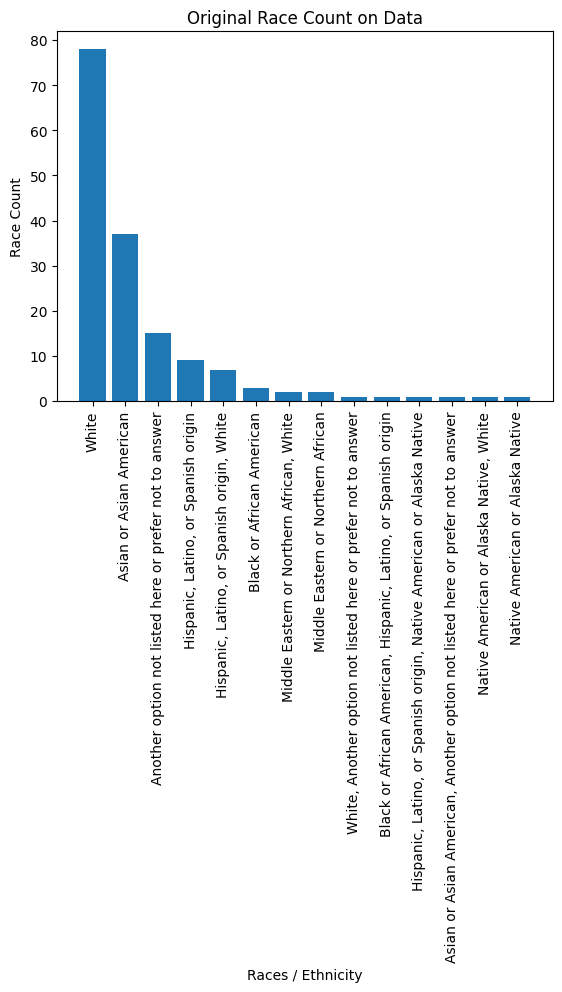

In [ ]:
# Bar plot

plt.bar(race_count.index, race_count.values)
plt.title('Original Race Count on Data')
plt.xlabel('Races / Ethnicity')
plt.ylabel('Race Count')
plt.xticks(rotation=90)

In [ ]:
# Unite values
data2 = data

data2['Cleaned Race'] = data2['Race']
data2['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, White', value='Hispanic, Latino, or Spanish origin', inplace=True)
data2['Cleaned Race'].replace(to_replace='Hispanic, Latino, or Spanish origin, Native American or Alaska Native', value='Hispanic, Latino, or Spanish origin', inplace=True)
data2['Cleaned Race'].replace(to_replace='Asian or Asian American, Another option not listed here or prefer not to answer', value='Asian or Asian American', inplace=True)
data2['Cleaned Race'].replace(to_replace='Middle Eastern or Northern African, White', value='Middle Eastern or Northern African', inplace=True)
data2['Cleaned Race'].replace(to_replace='Native American or Alaska Native, White', value='Native American or Alaska Native', inplace=True)
data2['Cleaned Race'].replace(to_replace='White, Another option not listed here or prefer not to answer', value='White', inplace=True)
data2['Cleaned Race'].replace(to_replace='Black or African American, Hispanic, Latino, or Spanish origin', value='Black or African American', inplace=True)
data2['Cleaned Race'].replace(to_replace='Another option not listed here or prefer not to answer', value='Other or Prefer Not to Answer', inplace=True)

data2['Cleaned Race'].value_counts()

Cleaned Race
White                                  79
Asian or Asian American                38
Hispanic, Latino, or Spanish origin    17
Other or Prefer Not to Answer          15
Black or African American               4
Middle Eastern or Northern African      4
Native American or Alaska Native        2
Name: count, dtype: int64

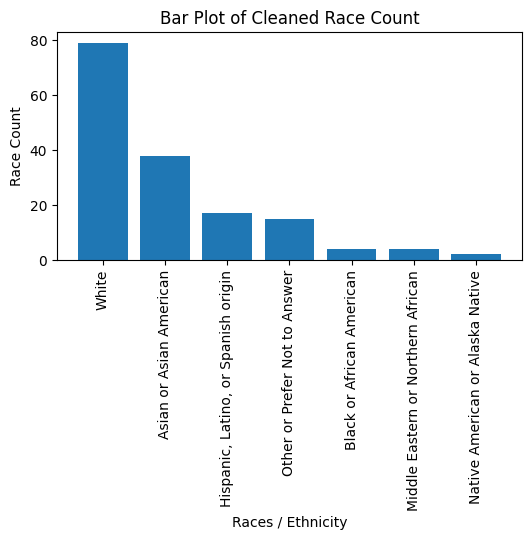

In [ ]:
# Bar plot
plt.figure(figsize=(6,6))
cleaned_race_count = data2['Cleaned Race'].value_counts()
plt.bar(cleaned_race_count.index, cleaned_race_count.values)
plt.title('Bar Plot of Cleaned Race Count')
plt.xlabel('Races / Ethnicity')
plt.ylabel('Race Count')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=.5)
plt.show()

In [ ]:
gender_counts = data2['Gender'].value_counts()
gender_counts

Gender
Woman                            103
Man                               50
Other or prefer not to answer      5
Non-binary                         1
Name: count, dtype: int64

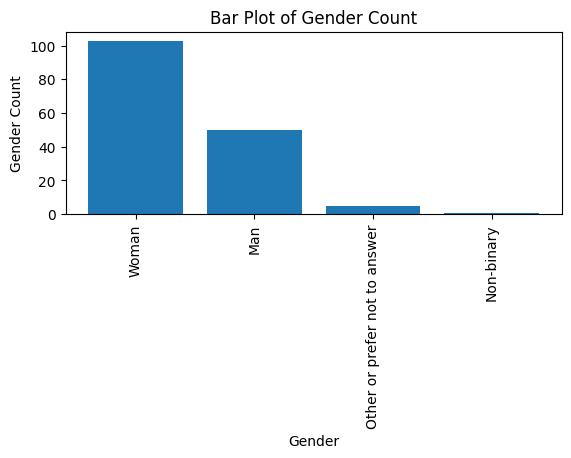

In [ ]:
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Bar Plot of Gender Count')
plt.xlabel('Gender')
plt.ylabel('Gender Count')
plt.subplots_adjust(bottom=.5)
plt.xticks(rotation=90)
plt.show()

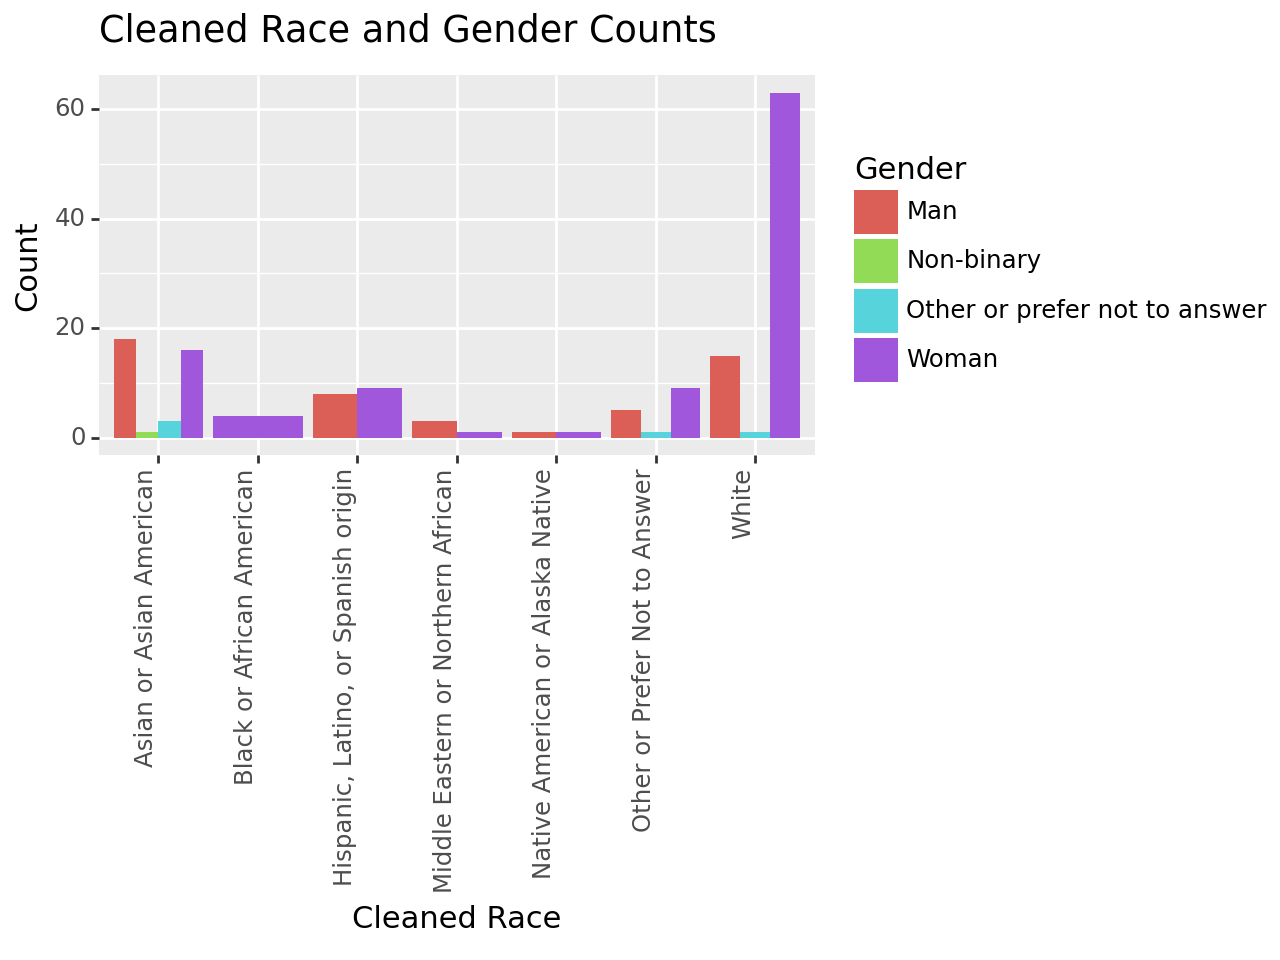

<Figure Size: (640 x 480)>

In [ ]:

race_gender_counts = data2.groupby(['Cleaned Race', 'Gender']).size().reset_index(name="Count")


ggplot(data=race_gender_counts, mapping=aes(x='Cleaned Race', y='Count', fill='Gender')) + \
    geom_col(position='dodge') + \
    theme(axis_text_x=element_text(rotation=90, hjust=1)) + \
    ggtitle("Cleaned Race and Gender Counts")


As we can see in both the plot and the previous method, most of the participants are Caucasian, followed by Asian. This may also present an issue with the creation of a model, as there is a strong bias for the data to take heavily into consideration both Caucasian and Asian races. 

In [ ]:
data.Country.value_counts()

Country
USA                    13
DENMARK                12
NORWAY                 12
INDIA                  11
SINGAPORE              11
AUSTRALIA               9
MALAYSIA                8
BRAZIL                  8
POLAND                  8
CZECH REPUBLIC          6
ARGENTINA               6
PHILIPPINES             6
ISRAEL                  6
CHINA                   4
NEW ZEALAND             4
MEXICO                  4
SOUTH KOREA             4
CANADA                  4
THAILAND                3
INDONESIA               2
COLOMBIA                2
TAIWAN                  2
SRI LANKA               1
SAUDI ARABIA            1
IRELAND                 1
CROATIA                 1
SOUTH AFRICA            1
TURKEY                  1
UK                      1
SCOTLAND                1
TRINIDAD AND TOBAGO     1
HUNGARY                 1
SWEDEN                  1
KUWAIT                  1
SWITZERLAND             1
NIGERIA                 1
Name: count, dtype: int64

Unfortunately, in the Country column we can observe that most of the responses are from the USA. However, the responses are slightly more distributed in the first 10 countries in the list. 

In [ ]:
p = (
ggplot(data, aes(x="Total earnings", color="Country"))+
    geom_histogram(fill="white", position="dodge") +
    theme(
        legend_direction='horizontal',
        legend_position='bottom'
  ) 
)
p

ModuleNotFoundError: No module named 'matplotlib.layout_engine'

In [ ]:
data.['Total earnings'].value_counts()

Total
10708.50     1
74000.00     1
2829.84      1
12199.40     1
135000.00    1
            ..
91000.00     1
65171.70     1
100737.00    1
70243.20     1
29848.80     1
Name: count, Length: 159, dtype: int64

# Modelling

Now that the data has been cleaned, the next step is to use this clean data to create predictive models in order to be able to associate different variables, such as country of origin, race, gender, age, etc. 
In order to be able to use most algorithms, the data needs to be either numerical, or one-hot encoded.
Several models will be tried: 
* Nearest Neighbors Classification
* Random forest

In [ ]:
data2.isna().sum()

Age                         0
Industry                    1
Job Title                   0
Country                     0
Work experience             0
Work experience in field    0
Education                   0
Gender                      0
Race                        0
Total                       0
Cleaned Race                0
dtype: int64

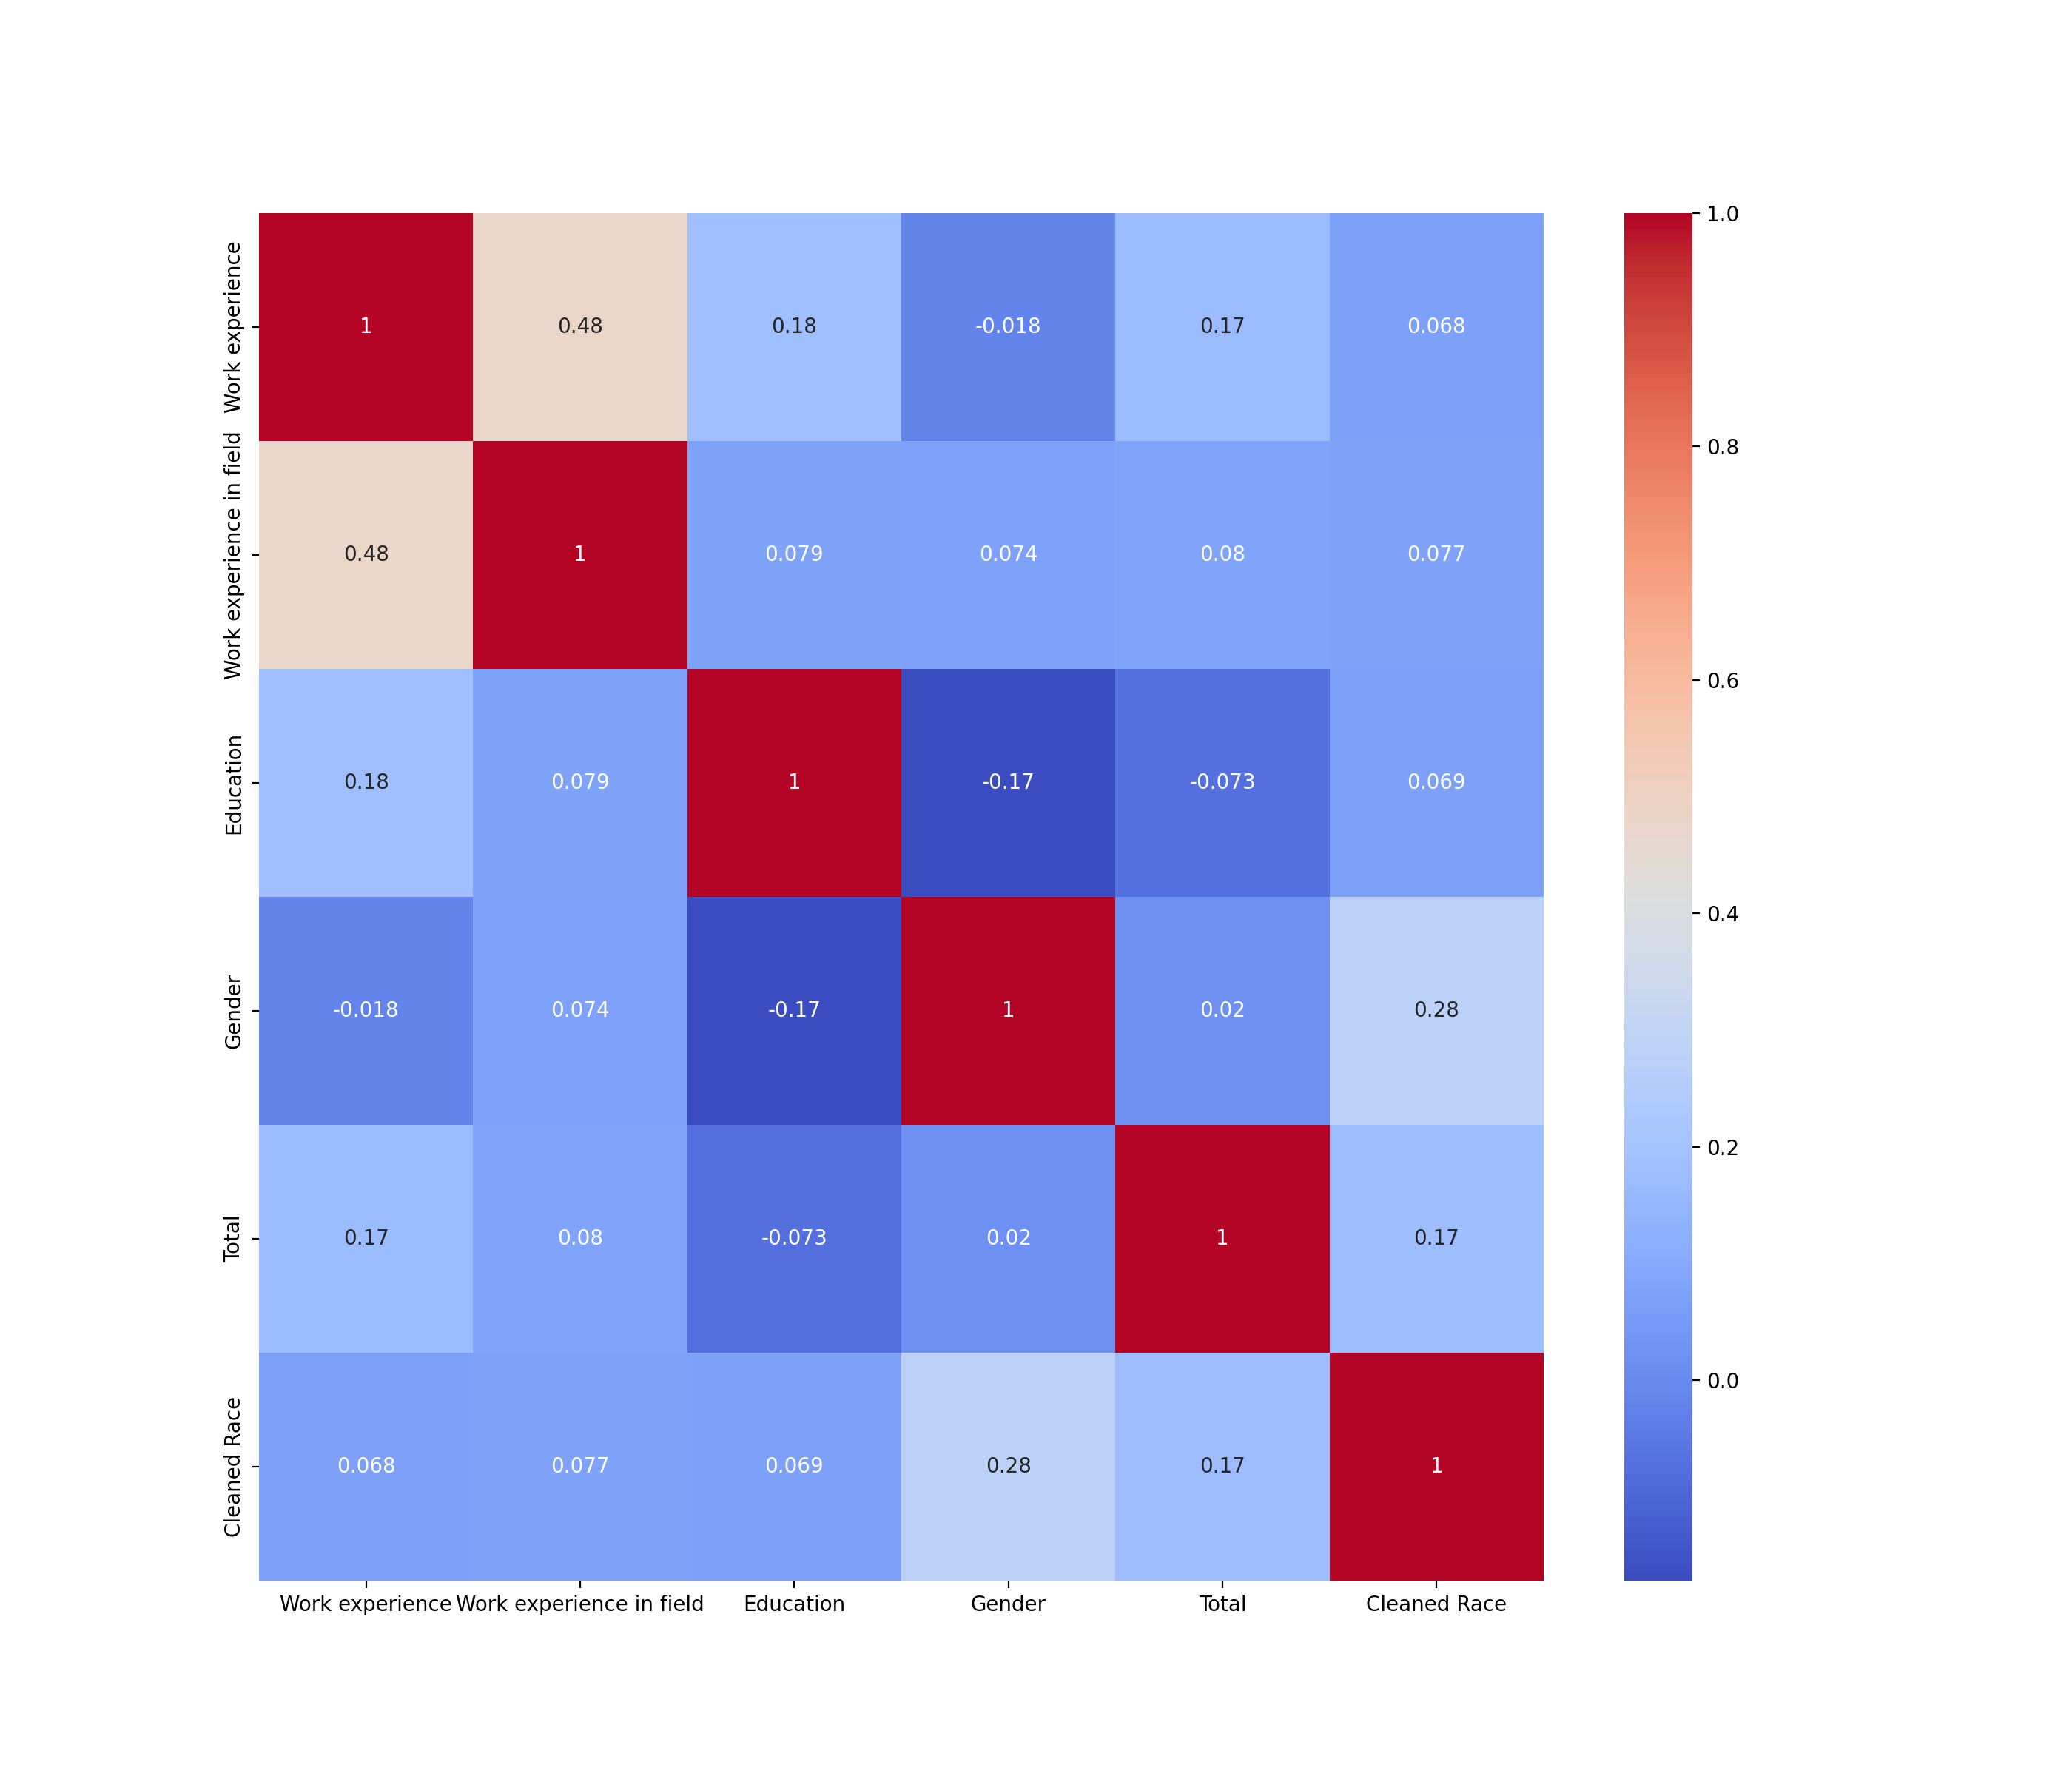

In [ ]:
data3 = data2.copy()

le = LabelEncoder()
data3['Gender'] = le.fit_transform(data3['Gender'])
data3['Cleaned Race'] = le.fit_transform(data3['Cleaned Race'])
data3['Work experience'] = le.fit_transform(data3['Work experience'])
data3['Work experience in field'] = le.fit_transform(data3['Work experience in field'])
data3['Education'] = le.fit_transform(data3['Education'])

# Dropping the non-numeric columns
data3.drop(columns=['Age', 'Industry', 'Job Title', 'Country', 'Race'], axis=1, inplace=True)

# Compute correlation matrix
correlation_matrix = data3.corr()

# Generate a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

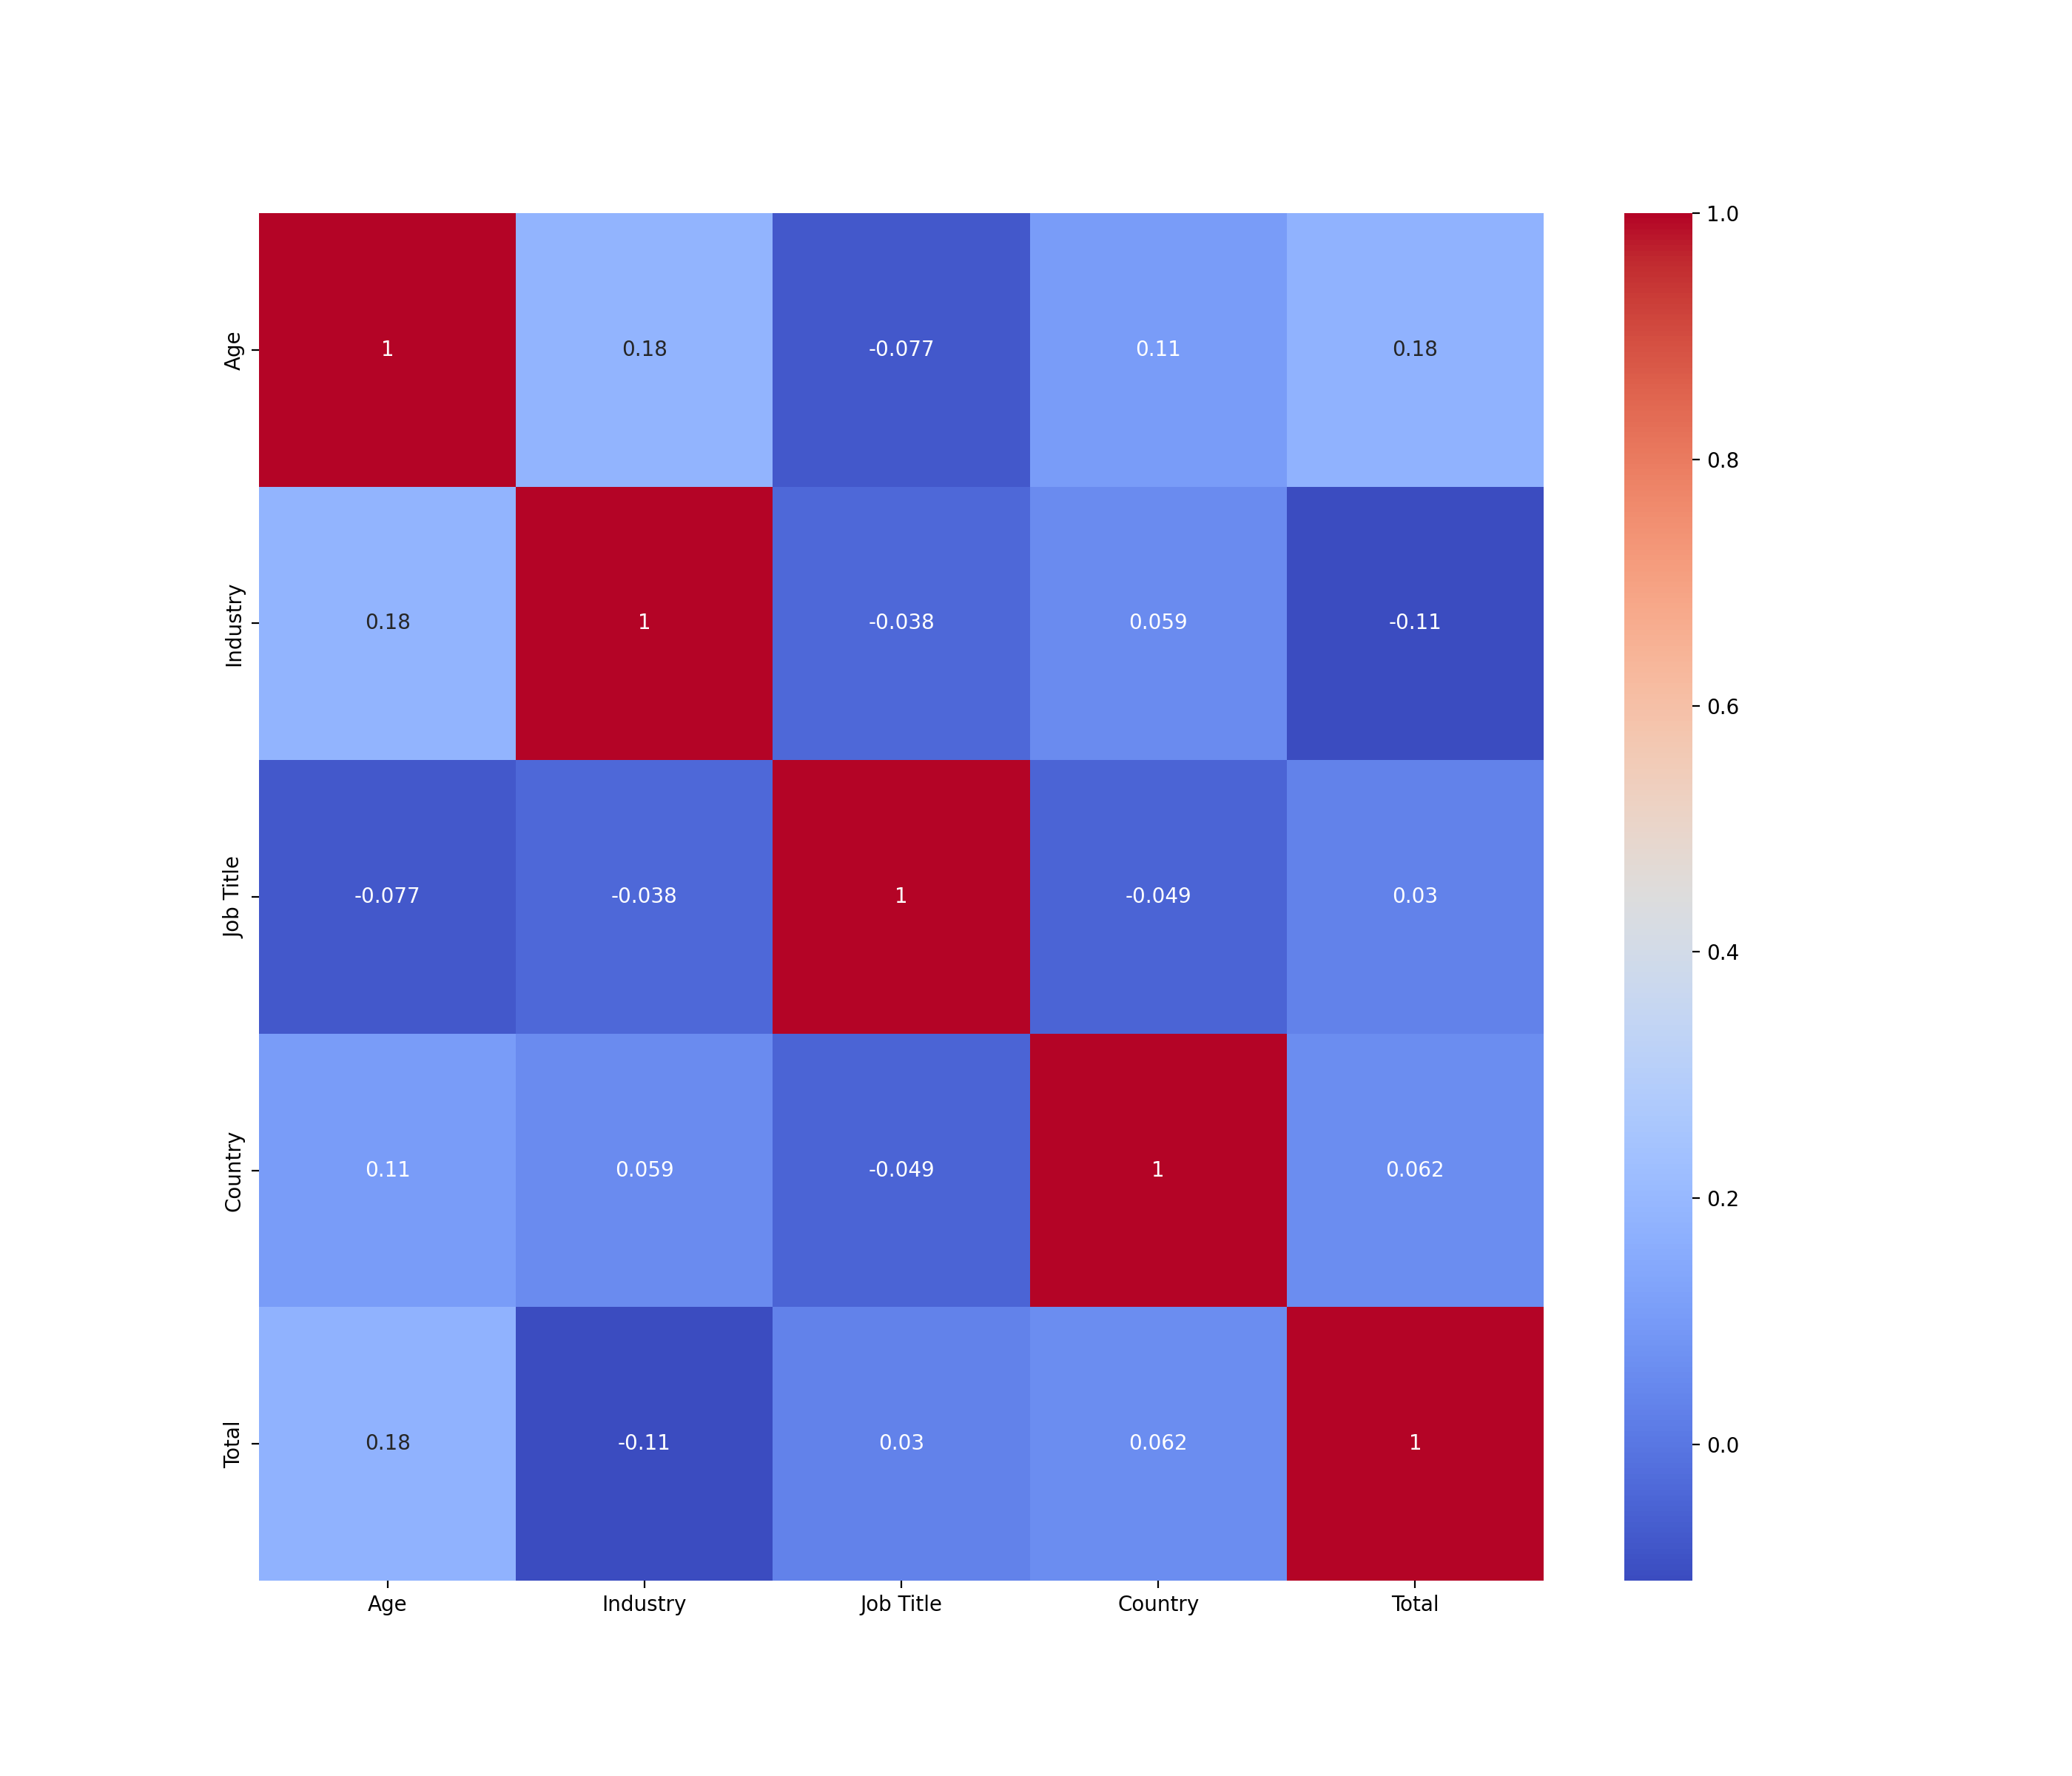

In [ ]:
data3 = data2.copy()

le = LabelEncoder()
data3['Age'] = le.fit_transform(data3['Age'])
data3['Country'] = le.fit_transform(data3['Country'])
data3['Industry'] = le.fit_transform(data3['Industry'])
data3['Job Title'] = le.fit_transform(data3['Job Title'])


# Dropping the non-numeric columns
data3.drop(columns=['Gender','Work experience in field', 'Work experience', 'Cleaned Race', 'Race', 'Education'], axis=1, inplace=True)

# Compute correlation matrix
correlation_matrix = data3.corr()

# Generate a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:


data4 = data2.copy()

le = LabelEncoder()
data4['Age'] = le.fit_transform(data3['Age'])
data4['Industry'] = le.fit_transform(data4['Industry'])
data4['Work experience'] = le.fit_transform(data4['Work experience'])
data4['Cleaned Race'] = le.fit_transform(data4['Cleaned Race'])

X = data4[['Age', 'Industry', 'Work experience', 'Cleaned Race']]
y = data4['Total earnings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)




In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coeff:", model.coef_)

Coeff: [11329.41787608  -843.41465055  7995.31336546  3263.04971756]


In [ ]:



y_hat_test = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_hat_test)

y_hat_train = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_hat_train)


print(f'Train MSE: {train_mse} Test MSE {test_mse}')

# 2940696833.370457

Train MSE: 3684194013.690895 Test MSE 1353058346.1723626


## DecisionTree Regressor

In [ ]:
X = data.drop(["Total earnings","Job Title"], axis=1)
cat_features = X.columns.to_numpy()

X = pd.get_dummies(data=X, columns=cat_features, drop_first=True)
y = data["Total earnings"].copy()

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
y_train

11656    104000.0
27373     67000.0
1920      67500.0
16007     89000.0
17671    177000.0
           ...   
21907     45760.0
5458     156843.0
875       83000.0
16026    112000.0
24029    132000.0
Name: Total earnings, Length: 22016, dtype: float64

In [ ]:

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train,y_train)

tree_y_pred = tree_reg1.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, tree_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, tree_y_pred))

Mean squared error: 119195938533801.11
Coefficient of determination: 0.33


## KNN

In [ ]:
# As the data is categorical, it needs to be set to one-hot encoded
data_prep = data.copy()
data_prep = data_prep.drop("Total earnings", axis=1)
x_encoded = pd.get_dummies(data_prep, prefix=["Age", "Industry", "Job Title",
                                "Country", "Work experience", "Work experience in field", "Education", "Gender", "Race"], drop_first=True)
x_encoded.head()
y = data.copy()
y["Total earnings"] = pd.cut(y["Total earnings"], [0,11000, 44725, 95375, 182100, 231250, 578125 ,float("inf")])
y = y["Total earnings"]
y_encoded = pd.get_dummies(y, prefix=["Total earnings"], drop_first=True)
y_encoded.head()

ValueError: Length of 'prefix' (9) did not match the length of the columns being encoded (12).

In [ ]:
# Nearest Neighbors Classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_encoded, y_encoded)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# We perform a prediction with this data
print(data_prep.iloc[1])
print(data.iloc[1]["Total"])

Age                                                       45-54
Industry                                            Health care
Job Title                                             EXECUTIVE
Country                                               ARGENTINA
Work experience                                   11 - 20 years
Work experience in field                          11 - 20 years
Education                                        College degree
Gender                                                    Woman
Race                        Hispanic, Latino, or Spanish origin
Name: 603, dtype: object
4782.01


In [ ]:
#! pip uninstall scikit-learn -y
#! pip install scikit-learn==1.2.2
#! pip show scikit-learn

In [ ]:
pred = np.array(x_encoded.iloc[1])
knn.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


array([[0, 0, 0, 0, 0, 0]], dtype=uint8)

As it can be seen in the prediction, this model does not work correctly for wages that fall outside the brackets of taxes for the US. 
The annual salary for a healthcare manager in Argentina is 4782 USD. This is far below the expected value, which is within 95375 and 182100 USD. 
The prediction model fails to account for these differences.
Now another test can be done with an observation of wages in the US, or with wages similar to the US

In [ ]:
print(data_prep.iloc[3])
print(data.iloc[3]["Total"])
print(y_encoded.iloc[3])

Age                                                  35-44
Industry                    Intergovernmental organization
Job Title                                       CONSULTANT
Country                                        SWITZERLAND
Work experience                              11 - 20 years
Work experience in field                         5-7 years
Education                                  Master's degree
Gender                                               Woman
Race                             Black or African American
Name: 1840, dtype: object
68982.0
['Total']_(11000.0, 44725.0]      0
['Total']_(44725.0, 95375.0]      1
['Total']_(95375.0, 182100.0]     0
['Total']_(182100.0, 231250.0]    0
['Total']_(231250.0, 578125.0]    0
['Total']_(578125.0, inf]         0
Name: 1840, dtype: uint8


In [ ]:
pred = np.array(x_encoded.iloc[3])
knn.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


array([[0, 1, 0, 0, 0, 0]], dtype=uint8)

As it can be seen, the prediction was a success for a person in a country with wages similar to the US
Afterwards, a comparison can be made with every observation available in the dataset

In [ ]:
pred_res = knn.predict(x_encoded)
actual_vals = y_encoded.values
comparison = pred_res == actual_vals
#print(comparison)
results = {True: 0, False: 0}
for c in comparison:
    if False in c:
        results[False]+=1
    else:
        results[True]+=1
print(results)


{True: 102, False: 57}


In [ ]:
success_rate = results[True] / (results[True] + results[False])
print(success_rate)

0.6415094339622641


As we can see, this simple model has a 60% succcess rate

## Random Fores

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_encoded, y_encoded)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# We perform a prediction with this data
print(data_prep.iloc[1])
print(data.iloc[1]["Total"])

Age                                                       45-54
Industry                                            Health care
Job Title                                             EXECUTIVE
Country                                               ARGENTINA
Work experience                                   11 - 20 years
Work experience in field                          11 - 20 years
Education                                        College degree
Gender                                                    Woman
Race                        Hispanic, Latino, or Spanish origin
Name: 603, dtype: object
4782.01


In [ ]:
pred = np.array(x_encoded.iloc[1])
clf.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
# We perform a prediction with this data
print(data_prep.iloc[3])
print(data.iloc[3]["Total"])

Age                                                  35-44
Industry                    Intergovernmental organization
Job Title                                       CONSULTANT
Country                                        SWITZERLAND
Work experience                              11 - 20 years
Work experience in field                         5-7 years
Education                                  Master's degree
Gender                                               Woman
Race                             Black or African American
Name: 1840, dtype: object
68982.0


In [ ]:
pred = np.array(x_encoded.iloc[3])
clf.predict(pred.reshape(1,-1))

/home/balika/dst1_env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
clf.predict(x_encoded)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 